In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 50

def gen_data(n,h,sd1,sd2):
    x1 = ss.norm.rvs(-h,sd1,n)
    y1 = ss.norm.rvs(0,sd1,n)

    x2 = ss.norm.rvs(h,sd2,n)
    y2 = ss.norm.rvs(0,sd2,n)
    return (x1,y1,x2,y2)


In [3]:
(x1,y1,x2,y2) = gen_data(1000, 1.5, 1, 1.5)
#gen_data(1000, 0, 1, 1)

#gen_data(1000, 1, 2, 2.5)

#gen_data(1000, 10, 100, 100)

#gen_data(1000, 20, .5, .5)

In [4]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1, "o", ms = 2)
    plt.plot(x2,y2, "o", ms = 2)
    plt.xlabel("$X_1$")
    plt.ylabel("$x_2$")


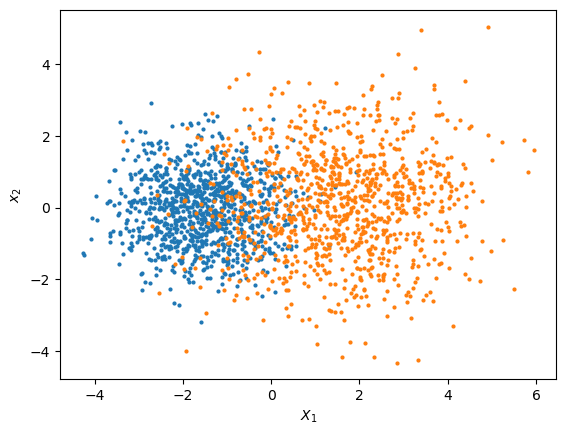

In [5]:
plot_data(x1,y1,x2,y2)

## What is one of the problems with using linear regression to predict probabilities?

#### Linear regression may predict values outside of the interval between 0 and 1.

In [6]:
from sklearn.linear_model import LogisticRegression


In [7]:
clf = LogisticRegression()

In [8]:
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))
X.shape


(2000, 2)

In [9]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

(2000,)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size = 0.5, random_state=1)
xtest.shape

(1000, 2)

In [11]:
clf.fit(xtrain,ytrain)

LogisticRegression()

In [12]:
clf.score(xtest,ytest)

0.884

In [13]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.95012888, 0.04987112]])

In [14]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [15]:
def plot_probs(ax,clf,class_no):
    xx1,xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis = 1))
    z = probs[:,class_no]
    z = z.reshape(xx1.shape)
    cs = ax.contourf(xx1,xx2,z)
    cbar = plt.colorbar(cs)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

Text(0.5, 1.0, 'Pred. probability for class 2:')

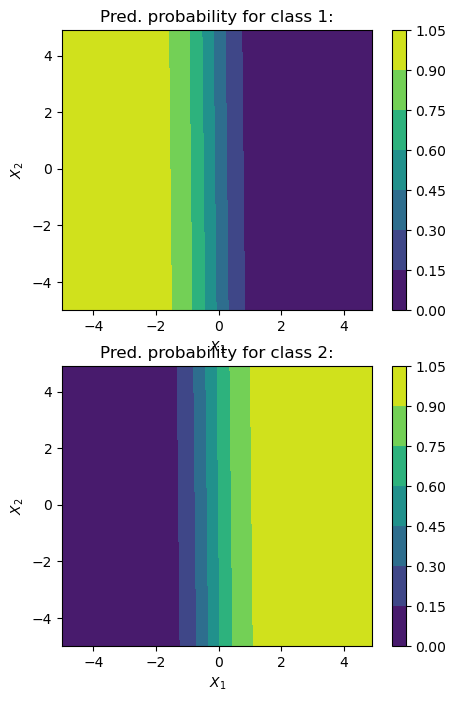

In [16]:
plt.figure(figsize = (5,8))
ax = plt.subplot(211)
plot_probs(ax,clf,0)
plt.title("Pred. probability for class 1:")
ax = plt.subplot(212)
plot_probs(ax,clf,1)
plt.title("Pred. probability for class 2:")

## The sum of the class probabilities:

#### will always equal 1 for any number of classes.